# **Assignment-04-Simple Linear Regression**

# **Question no-1**

In [136]:
# Question no-1
"1) Delivery_time -> Predict delivery time using sorting time"

'1) Delivery_time -> Predict delivery time using sorting time'

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time (2).csv


In [139]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **EDA and Data Visualization**

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [141]:
import seaborn as sns

<ipython-input-142-395f6b0195c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

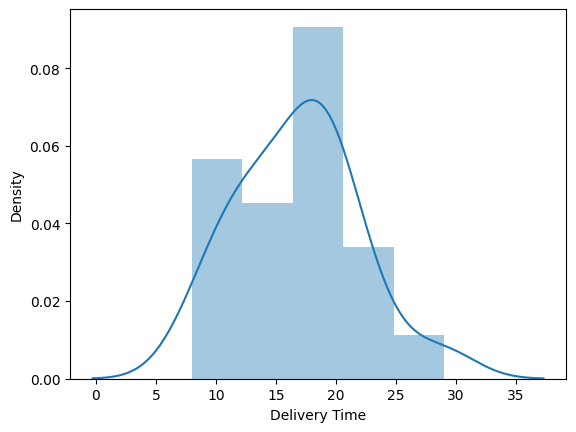

In [142]:
sns.distplot(data["Delivery Time"])

<ipython-input-143-ea343d2ed14a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

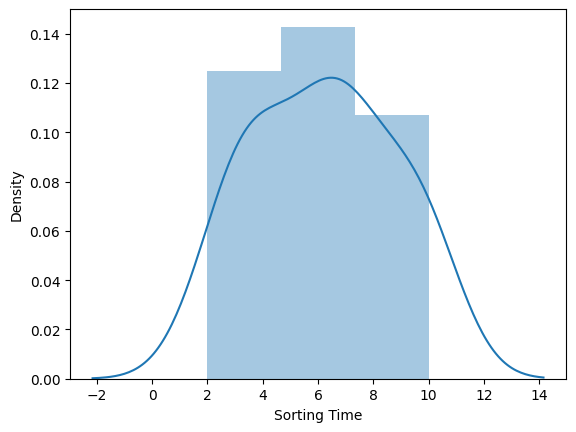

In [143]:
sns.distplot(data["Sorting Time"])

# **Feature engineerings**

In [144]:
# Renaming columns
data = data.rename({"Delivery Time" : "delivery_time", "Sorting Time" : "sorting_time"}, axis = 1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **Correlation Analysis**

In [145]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

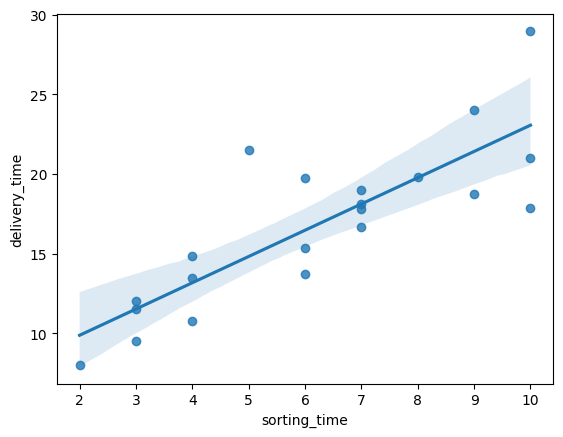

In [146]:
sns.regplot(x = data["sorting_time"], y = data["delivery_time"])

# **Transformation(log)**

In [147]:
dataset = np.log(data[["delivery_time","sorting_time"]])
dataset

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


# **Fitting a Simple Linear Regression Model**

# **Model Building**

In [148]:
import statsmodels.formula.api as smf

In [149]:
model = smf.ols("delivery_time ~ sorting_time", data = dataset).fit()

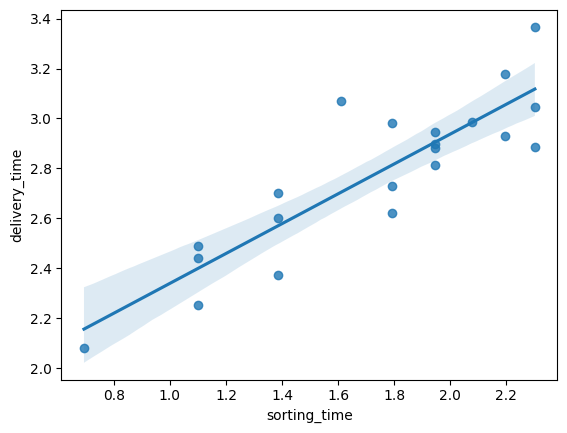

In [150]:
sns.regplot(x = "sorting_time", y = "delivery_time", data = dataset);

# **Model Testing**

In [151]:
# Finding coefficient prameters
model.params

Intercept       1.741987
sorting_time    0.597522
dtype: float64

In [153]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# **Model Predictions**

In [154]:
# Automatic prediction for say sorting time 5,10
new_data = pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [155]:
data_pred = pd.DataFrame(new_data, columns=["sorting_time"])
data_pred

,sorting_time
0,5
1,10


In [156]:
model.predict(data_pred)

0    4.729599
1    7.717210
dtype: float64

# **Tranformation(square root)**

In [157]:
dataset = np.sqrt(data[["delivery_time","sorting_time"]])
dataset

,delivery_time,sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


# **Model Building**

In [158]:
model = smf.ols("delivery_time ~ sorting_time", data = dataset).fit()

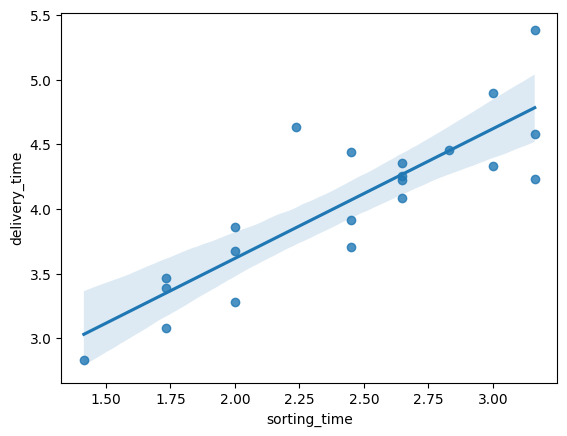

In [159]:
sns.regplot(x = "sorting_time", y = "delivery_time", data = dataset);

# **Model Testing**

In [160]:
# Finding coefficient parameters
model.params

Intercept       1.613479
sorting_time    1.002217
dtype: float64

In [161]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.7292011987544665, 0.7149486302678596)

# **Model Prediction**

In [162]:
# Automatic Prediction for say sorting time 5,10
new_data = pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [163]:
data_pred = pd.DataFrame(new_data, columns = ["sorting_time"])
data_pred

,sorting_time
0,5
1,10


In [164]:
model.predict(data_pred)

0     6.624563
1    11.635647
dtype: float64

# **Transformation(cube root)**

In [165]:
dataset = np.cbrt(data[["delivery_time", "sorting_time"]])
dataset

,delivery_time,sorting_time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435
5,2.485246,1.817121
6,2.668402,1.912931
7,2.117912,1.442250
8,2.615879,2.154435
9,2.656646,2.080084


# **Model Building**

In [166]:
import statsmodels.formula.api as smf

In [170]:
model = smf.ols("delivery_time ~ sorting_time", data = dataset).fit()

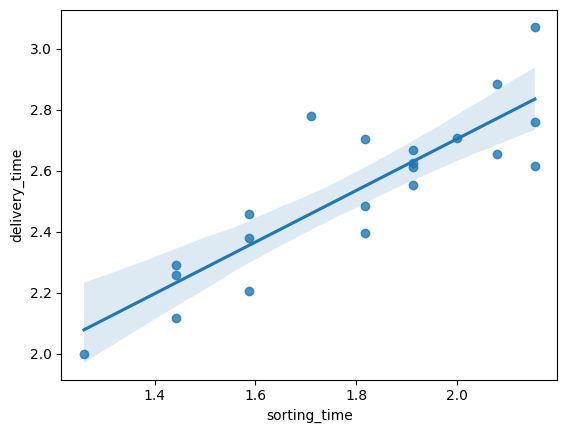

In [171]:
sns.regplot(x = "sorting_time", y = "delivery_time", data = dataset);

# **Model Testing**

In [172]:
# Finding coefficient parameters
model.params

Intercept       1.013571
sorting_time    0.845585
dtype: float64

In [173]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.7441167577566266, 0.7306492186911859)

# **Model Prediction**

In [174]:
# Automatic Prediction for say sorting time 5,10
new_data = pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [175]:
data_pred = pd.DataFrame(new_data, columns = ["sorting_time"])
data_pred

,sorting_time
0,5
1,10


In [176]:
model.predict(data_pred)

0    5.241495
1    9.469419
dtype: float64

# **Question no-2**

In [177]:
# Question no-2
"2) Salary_hike -> Build a prediction model for Salary_hike. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python."

'2) Salary_hike -> Build a prediction model for Salary_hike. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.'

In [178]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [179]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **EDA and Data Visualization**

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-183-ab1d94ab77e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

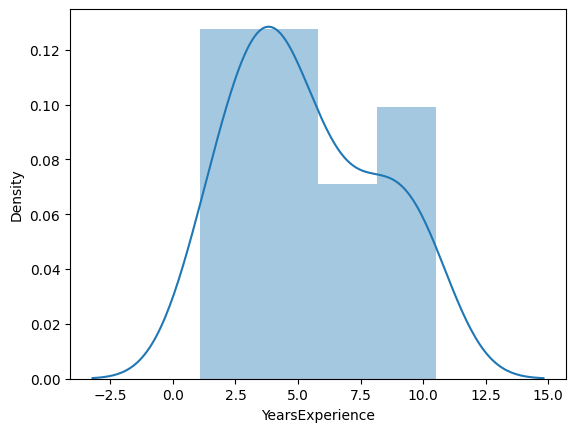

In [183]:
sns.distplot(df["YearsExperience"])

<ipython-input-184-008bfdec3472>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

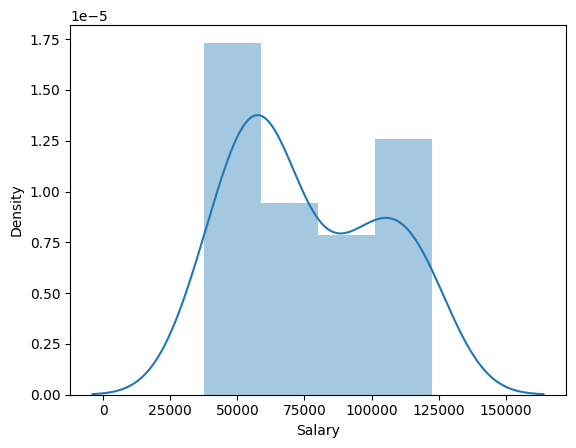

In [184]:
sns.distplot(df["Salary"])

In [223]:
# Renaming the columns
df = df.rename({"YearsExperience" : "Experience", "Salary" : "salary"}, axis = 1)
df

,Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **Correlation Analysis**

In [186]:
df.corr()

,Experience,salary
Experience,1.000000,0.978242
salary,0.978242,1.000000


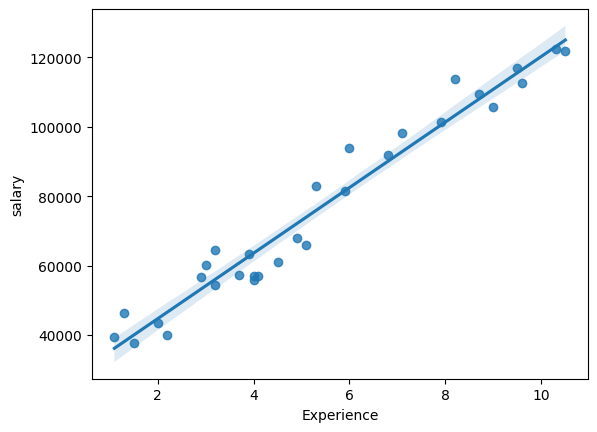

In [187]:
sns.regplot(x = "Experience", y = "salary", data = df);

# **Transformation(log)**

In [189]:
dataset = np.log(df[["salary","Experience"]])
dataset

,salary,Experience
0,10.580073,0.095310
1,10.740843,0.262364
2,10.538237,0.405465
3,10.681091,0.693147
4,10.593906,0.788457
5,10.944506,1.064711
6,11.004597,1.098612
7,10.904946,1.163151
8,11.073567,1.163151
9,10.954117,1.308333


# **Fitting a Simple Linear Regression Model**

In [191]:
model = smf.ols("salary ~ Experience", data = dataset).fit()

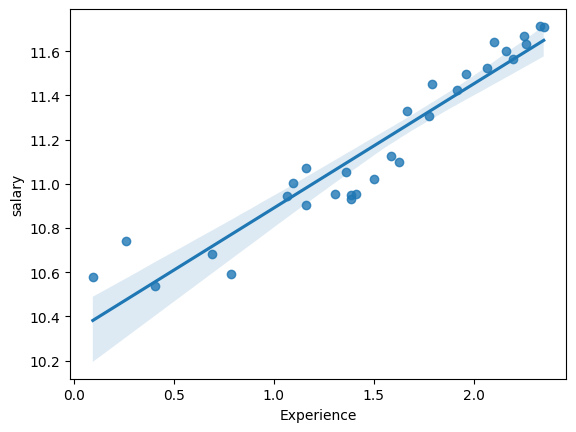

In [192]:
sns.regplot(x = "Experience", y = "salary", data = dataset);

# **Model Testing**

In [193]:
# Finding coefficient parameters
model.params

Intercept     10.328043
Experience     0.562089
dtype: float64

In [194]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

# **Model Prediction**

In [196]:
# Automatic prediction for 4 and 8 years experience
new_data = pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [197]:
data_pred = pd.DataFrame(new_data, columns = ["Experience"])
data_pred

,Experience
0,4
1,8


In [198]:
model.predict(data_pred)

0    12.576399
1    14.824754
dtype: float64

# **Transformation(square root)**

In [199]:
dataset = np.sqrt(df[["salary","Experience"]])
dataset

,salary,Experience
0,198.350700,1.048809
1,214.953483,1.140175
2,194.244691,1.224745
3,208.626460,1.414214
4,199.727314,1.483240
5,237.995798,1.702939
6,245.254969,1.732051
7,233.334524,1.788854
8,253.860198,1.788854
9,239.142217,1.923538


# **Model Building**

In [200]:
model = smf.ols("salary ~ Experience", data = dataset).fit()

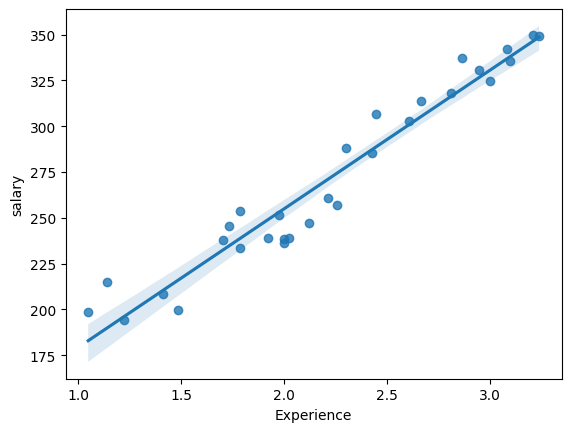

In [201]:
sns.regplot(x = "Experience", y = "salary", data = dataset);

# **Model Testing**

In [205]:
# Finding coefficient parameters
model.params

Intercept     103.568031
Experience     75.626932
dtype: float64

In [206]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

# **Model Prediction**

In [207]:
# Automatic Prediction for 4 and 8 years experience
new_data = pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [211]:
data_pred = pd.DataFrame(new_data, columns = ["Experience"])
data_pred

,Experience
0,4
1,8


In [212]:
model.predict(data_pred)

0    406.075758
1    708.583486
dtype: float64

# **Transformation(cube root)**

In [213]:
dataset = np.cbrt(df[["salary","Experience"]])
dataset

,salary,Experience
0,34.011242,1.032280
1,35.883626,1.091393
2,33.540235,1.144714
3,35.175984,1.259921
4,34.168426,1.300591
5,38.404271,1.426043
6,39.181273,1.442250
7,37.901174,1.473613
8,40.092494,1.473613
9,38.527500,1.546680


# **Model Building**

In [214]:
model = smf.ols("salary ~ Experience", data = dataset).fit()

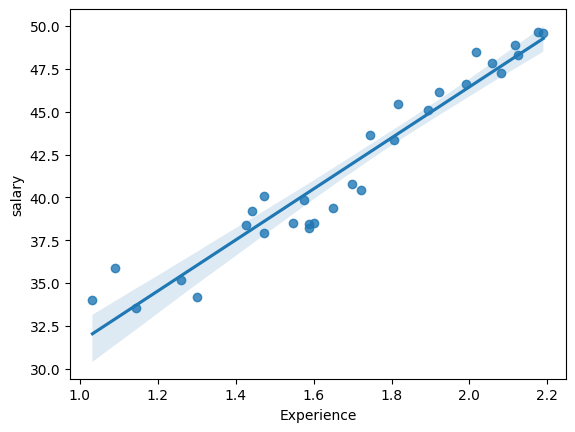

In [215]:
sns.regplot(x = "Experience", y = "salary", data = dataset);

# **Model Testing**

In [216]:
# Finding Coefficient parameters
model.params

Intercept     16.660277
Experience    14.896252
dtype: float64

In [217]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.9324434036761003, 0.9300306680931039)

# **Model Prediction**

In [219]:
# Automatic Prediction for 4 and 8 years experience
new_data = pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [220]:
data_pred = pd.DataFrame(new_data, columns = ["Experience"])
data_pred

,Experience
0,4
1,8


In [221]:
model.predict(data_pred)

0     76.245284
1    135.830292
dtype: float64